In [26]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Load dataset
data = pd.read_csv('diabetes.csv')

# Split into features and target
X = data.drop('Outcome', axis=1).values
y = data['Outcome'].values

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perceptron class with accuracy tracking
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.accuracy_history = []

    def activation_function(self, z):
        """Step activation function."""
        return np.where(z >= 0, 1, 0)

    def fit(self, X, y):
        """Train the Perceptron model and track accuracy."""
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Training loop
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)
                
                # Update rule
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
            
            # Calculate and store accuracy
            accuracy = np.mean(self.predict(X) == y)
            self.accuracy_history.append(accuracy)

    def predict(self, X):
        """Make predictions."""
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_function(linear_output)
        return y_predicted

# Measure execution time
start_time = time.time()

# Train the model
perceptron = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron.fit(X_train_scaled, y_train)

# Measure execution time
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

# Evaluate accuracy on test set
y_pred = perceptron.predict(X_test_scaled)
accuracy = np.mean(y_pred == y_test)
print(f"Test set accuracy: {accuracy * 100:.2f}%")

# Confusion matrix calculation
TP = np.sum((y_test == 1) & (y_pred == 1))  # True Positives
TN = np.sum((y_test == 0) & (y_pred == 0))  # True Negatives
FP = np.sum((y_test == 0) & (y_pred == 1))  # False Positives
FN = np.sum((y_test == 1) & (y_pred == 0))  # False Negatives

# Precision and Recall
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# 1. Saving the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')  # Save as PNG file
plt.close()  # Close the figure

# 2. Saving the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)  # Using predicted classes instead of probabilities
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('roc_curve.png')  # Save as PNG file
plt.close()  # Close the figure

# 3. Saving Feature Importance
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
importance = np.abs(perceptron.weights)

plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='skyblue')
plt.xlabel('Absolute Weight Value')
plt.title('Feature Importance in Perceptron Model')
plt.savefig('feature_importance.png')  # Save as PNG file
plt.close()  # Close the figure

print("All plots saved successfully!")


Execution time: 14.10 seconds
Test set accuracy: 76.62%
Precision: 0.73
Recall: 0.55
All plots saved successfully!


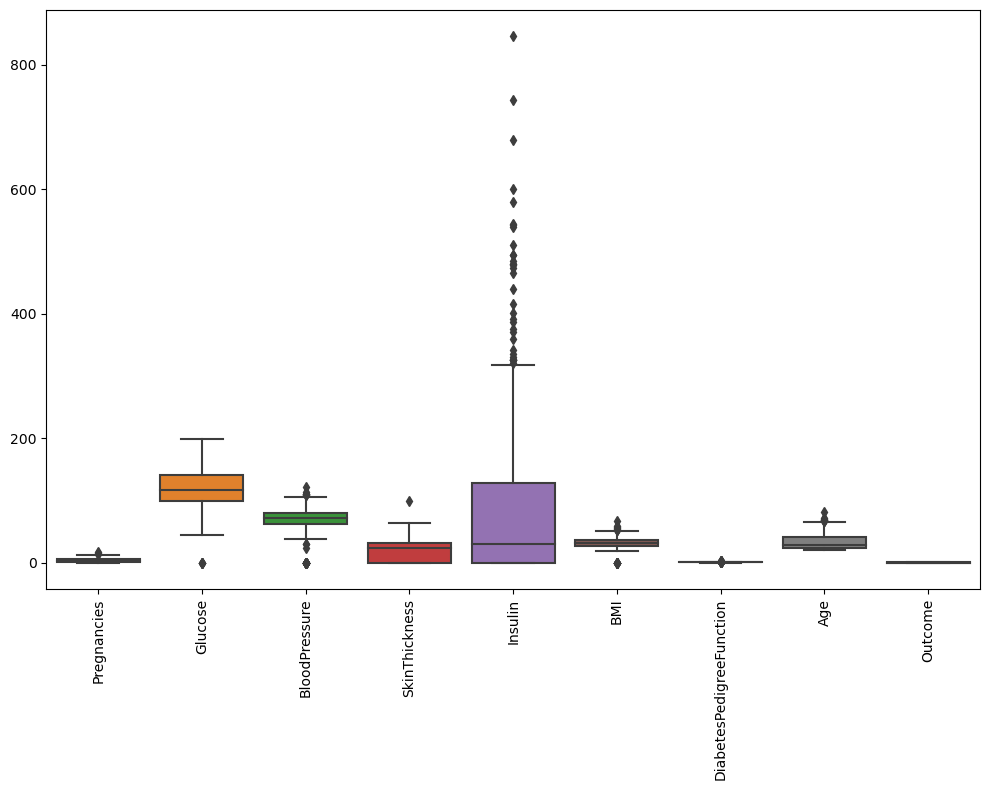

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots
plt.figure(figsize=(10, 8))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('boxplot_features.png')
plt.show()


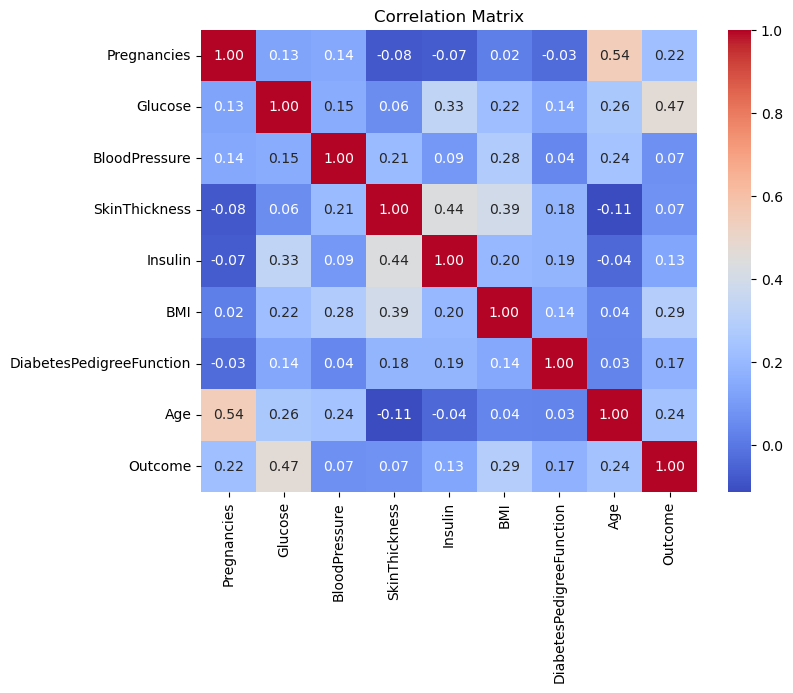

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('correlation_heatmap.png')
plt.show()


\begin{figure}[ht]
    \centering
    \includegraphics[width=0.48\textwidth]{histogram_features.png}
    \caption{Histograms for the Features of the Dataset}
    \label{fig:histograms}
\end{figure}


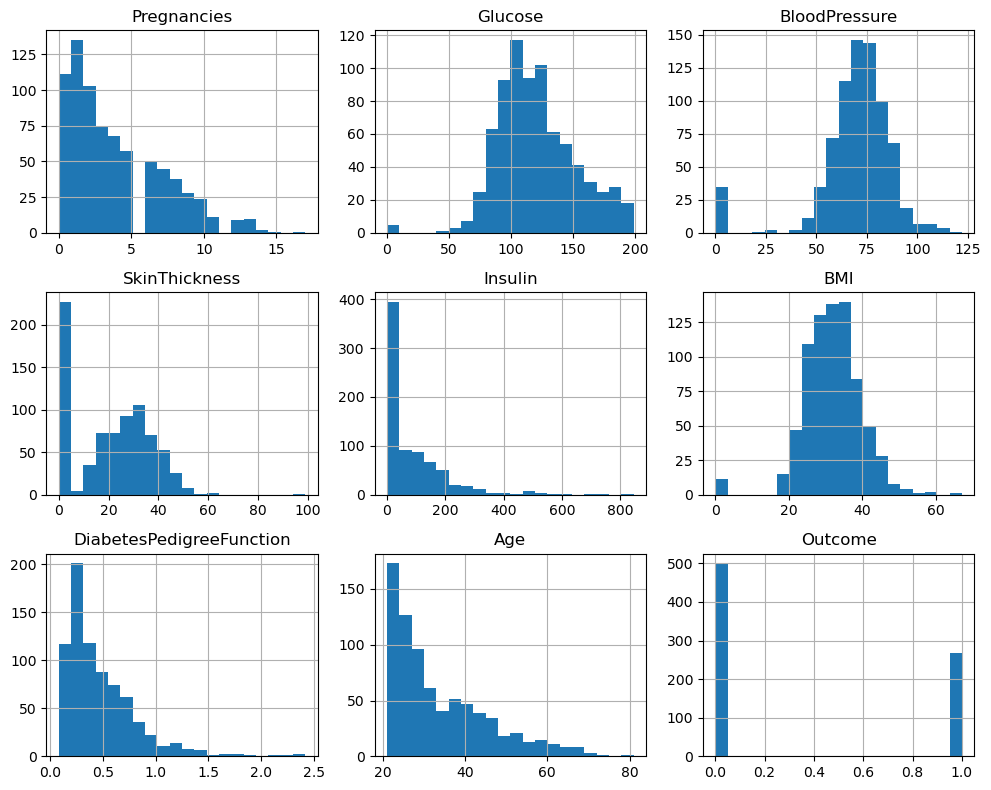

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
data = pd.read_csv('diabetes.csv')

# Plot histograms
data.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.savefig('histogram_features.png')
plt.show()


In [20]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv('diabetes.csv')

# Split into features and target
X = data.drop('Outcome', axis=1).values
y = data['Outcome'].values

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perceptron class with accuracy tracking
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.accuracy_history = []

    def activation_function(self, z):
        """Step activation function."""
        return np.where(z >= 0, 1, 0)

    def fit(self, X, y):
        """Train the Perceptron model and track accuracy."""
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Training loop
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)
                
                # Update rule
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
            
            # Calculate and store accuracy
            accuracy = np.mean(self.predict(X) == y)
            self.accuracy_history.append(accuracy)

    def predict(self, X):
        """Make predictions."""
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_function(linear_output)
        return y_predicted

# Measure execution time
start_time = time.time()

# Train the model
perceptron = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron.fit(X_train_scaled, y_train)

# Measure execution time
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

# Evaluate accuracy on test set
y_pred = perceptron.predict(X_test_scaled)
accuracy = np.mean(y_pred == y_test)
print(f"Test set accuracy: {accuracy * 100:.2f}%")

# Confusion matrix calculation
TP = np.sum((y_test == 1) & (y_pred == 1))  # True Positives
TN = np.sum((y_test == 0) & (y_pred == 0))  # True Negatives
FP = np.sum((y_test == 0) & (y_pred == 1))  # False Positives
FN = np.sum((y_test == 1) & (y_pred == 0))  # False Negatives

# Precision and Recall
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Execution time: 14.29 seconds
Test set accuracy: 76.62%
Precision: 0.73
Recall: 0.55


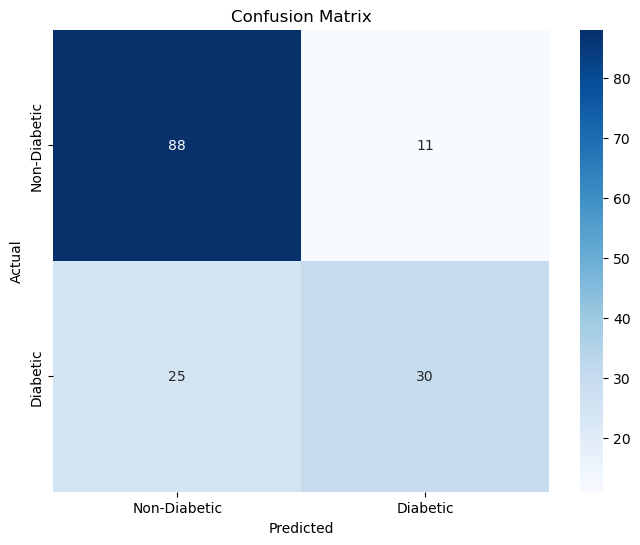

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


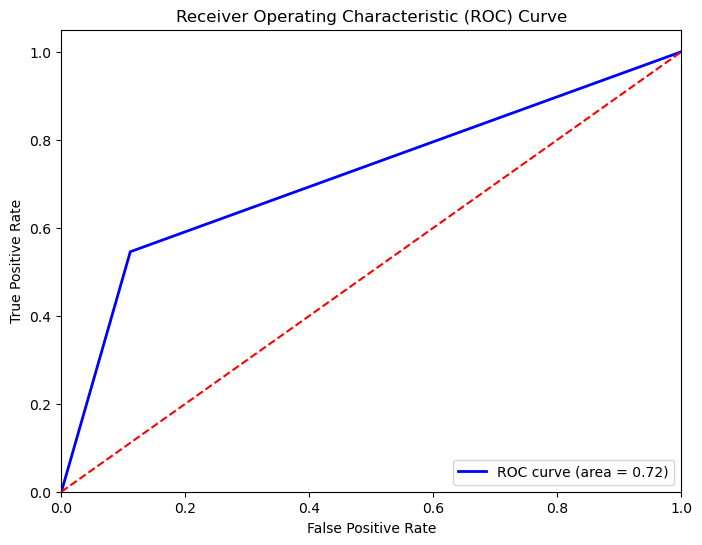

In [22]:
from sklearn.metrics import roc_curve, auc

# Calculate the probabilities
y_prob = perceptron.predict(X_test_scaled)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


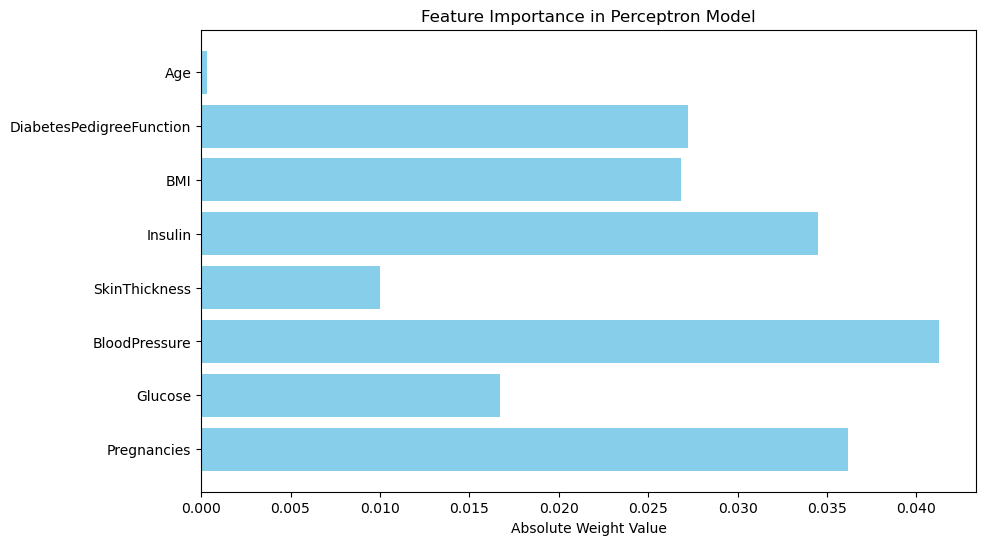

In [23]:
# Feature Importance
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
importance = np.abs(perceptron.weights)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='skyblue')
plt.xlabel('Absolute Weight Value')
plt.title('Feature Importance in Perceptron Model')
plt.show()
